In [1]:
import numpy as np
import os
import cv2
import pathlib
import matplotlib.pyplot as plt
import random
from PIL import Image

In [2]:
data_dir = r'.\sliced_images_folder\all_images_jpg\yes'

In [3]:
data_dir = pathlib.Path(data_dir)
yes_images = list(data_dir.glob('*.jpg'))
print(len(yes_images))

4499


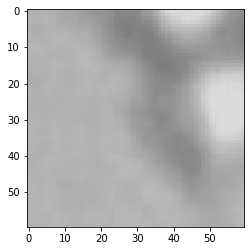

In [4]:
# test
img = cv2.imread(str(yes_images[0]))
plt.imshow(img)

In [5]:
def original_img(img):
    return img

def vertical_flip(img):
    return cv2.flip(img, 0)

def horizontal_flip(img):
    return cv2.flip(img, 1)

def rotation_90_degree(img):
    angle = random.choice([
        cv2.ROTATE_180,
        cv2.ROTATE_90_CLOCKWISE,
        cv2.ROTATE_90_COUNTERCLOCKWISE
    ])
    img = cv2.rotate(img, angle)
    img.astype(np.uint8)
    return img
    

def contrast_edit(img):
    alpha = 1
    while 0.95 < alpha < 1.05:
        alpha = random.uniform(0.9, 1.1)
    if alpha > 1:
        beta = random.randint(-20, 30)
    else:
        beta = random.randint(0, 30)
    img = cv2.convertScaleAbs(img, alpha = alpha, beta = beta)
    img.astype(np.uint8)
    return img

def gaussian_blur(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img.astype(np.uint8)
    return img
    

In [6]:
images = [
    img,
    vertical_flip(img),
    horizontal_flip(img),
    rotation_90_degree(img),
    contrast_edit(img),
    gaussian_blur(img)
]

augmentation_label = [
    'Original',
    'Vertical Flip',
    'Horizontal Flip',
    'Rotation',
    'Contrast Edit',
    'Gaussian Blur'
]

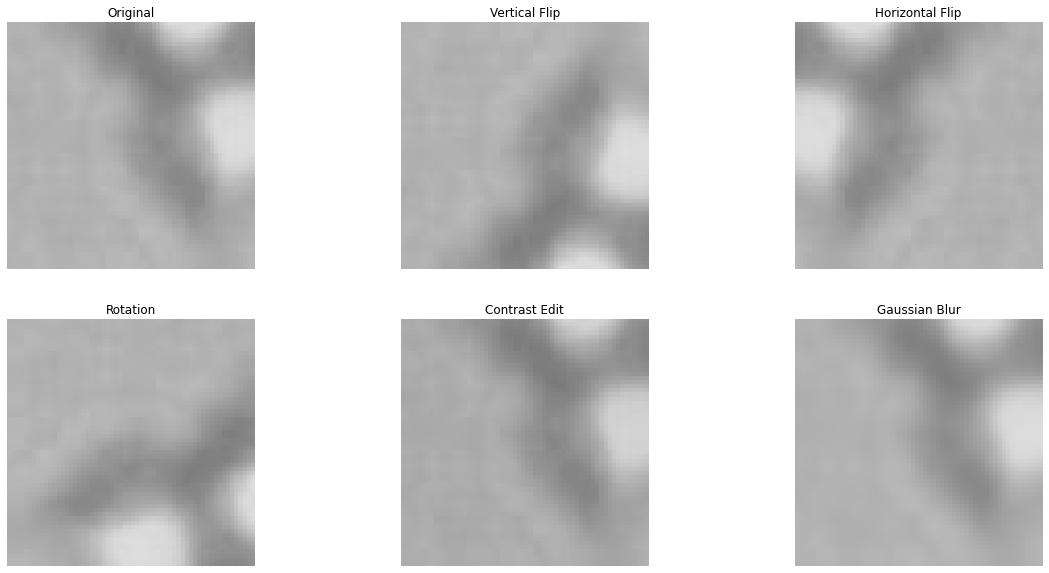

In [7]:
# Visualize all augmentation for an image
plt.figure(figsize = (20, 10))
for i in range (6):
    ax = plt.subplot(2, 3, i+1) 
    plt.imshow(images[i])
    
    plt.title(augmentation_label[i])
    plt.axis('off')

In [8]:
def clear_folder(target, flag = False):
    # reset 'yes' folder
    if flag:
        import shutil
        shutil.rmtree(target)
        os.mkdir(target)
        print('Folder cleared!')
    else:
        pass

target = fr'.\sliced_images_folder\balanced_dataset\yes'
clear_folder(target, False)

In [9]:
def augmentation(target, flag = False):
    # from 1 image this will create * 6
    # 4499 * 6 = 26944
    if flag:
        for i in range (len(yes_images)):
            yes_images[i] = str(yes_images[i])
            img = cv2.imread(yes_images[i])
            filename, extension = yes_images[i].split('\\')[-1].split('.')
            Image.fromarray(original_img(img)).save(fr'{target}\\{filename}o.{extension}')        # o -> original
            Image.fromarray(vertical_flip(img)).save(fr'{target}\\{filename}v.{extension}')       # v -> vertical
            Image.fromarray(horizontal_flip(img)).save(fr'{target}\\{filename}h.{extension}')     # h -> horizontal
            Image.fromarray(rotation_90_degree(img)).save(fr'{target}\\{filename}r.{extension}')  # r -> rotation
            Image.fromarray(contrast_edit(img)).save(fr'{target}\\{filename}c.{extension}')       # c -> contrast
            Image.fromarray(gaussian_blur(img)).save(fr'{target}\\{filename}b.{extension}')       # b -> blur
    else:
        pass

In [11]:
augmentation(target, True)